<a href="https://colab.research.google.com/github/omshreya-s/URV/blob/main/URV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np

# Removing Noise

In [39]:
def butter_lowpass_filter(data, cutoff, fs, order):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    y = filtfilt(b, a, data)
    return y


# Raw QVAR, Moving Average, Gaussian, Median Filter

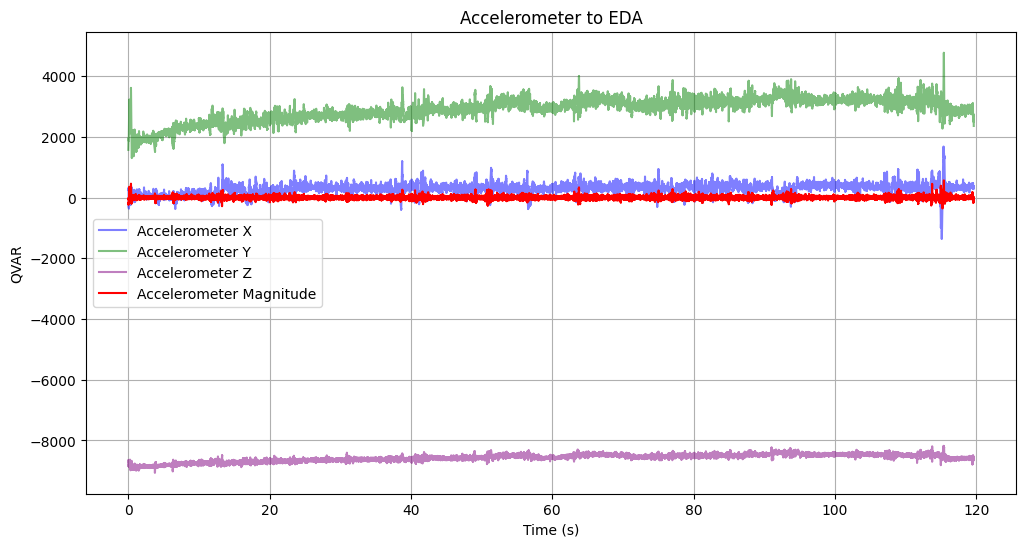

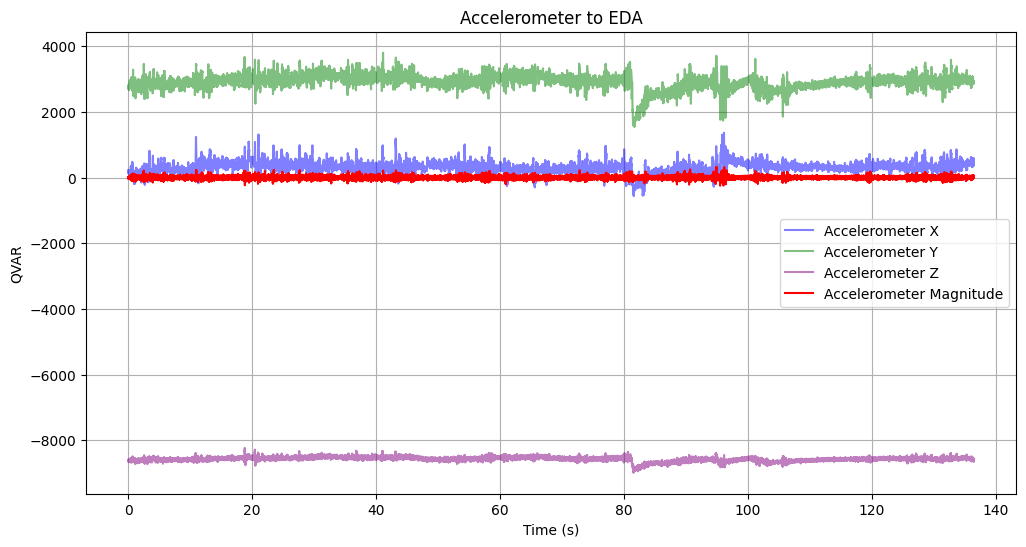

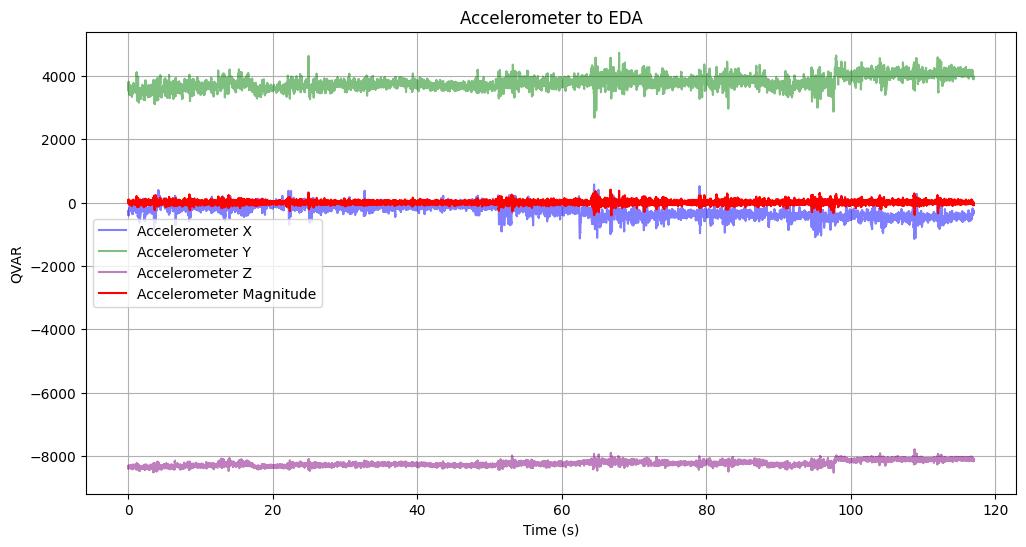

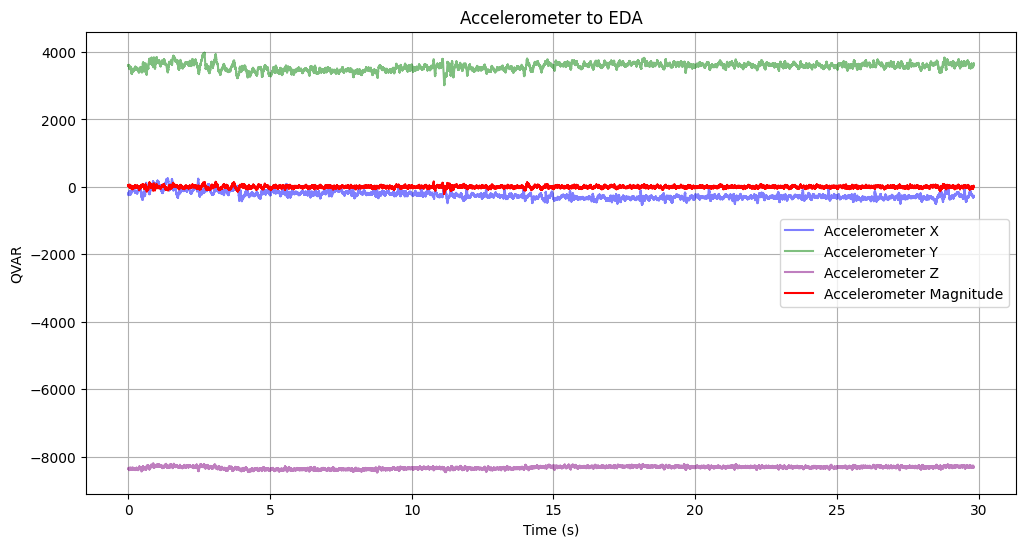

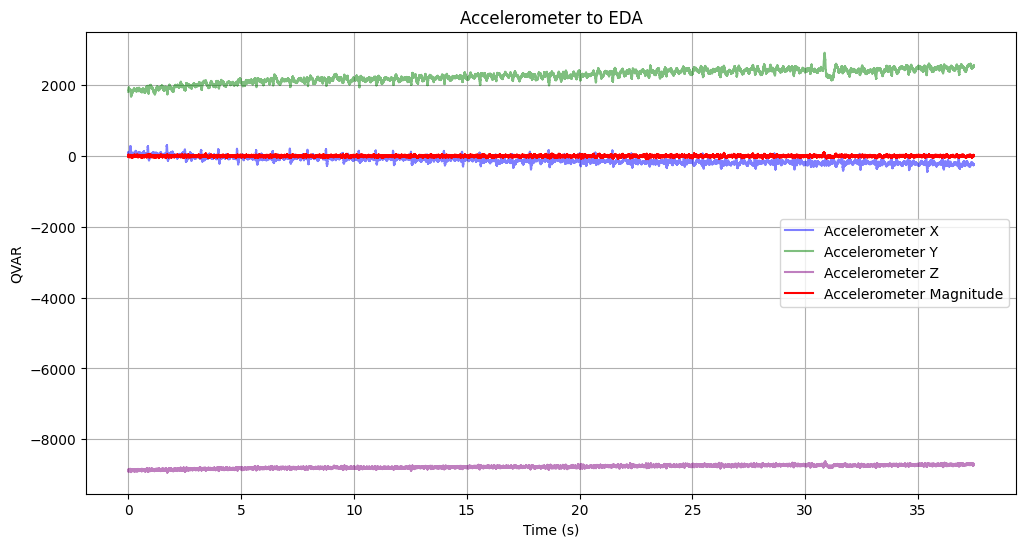

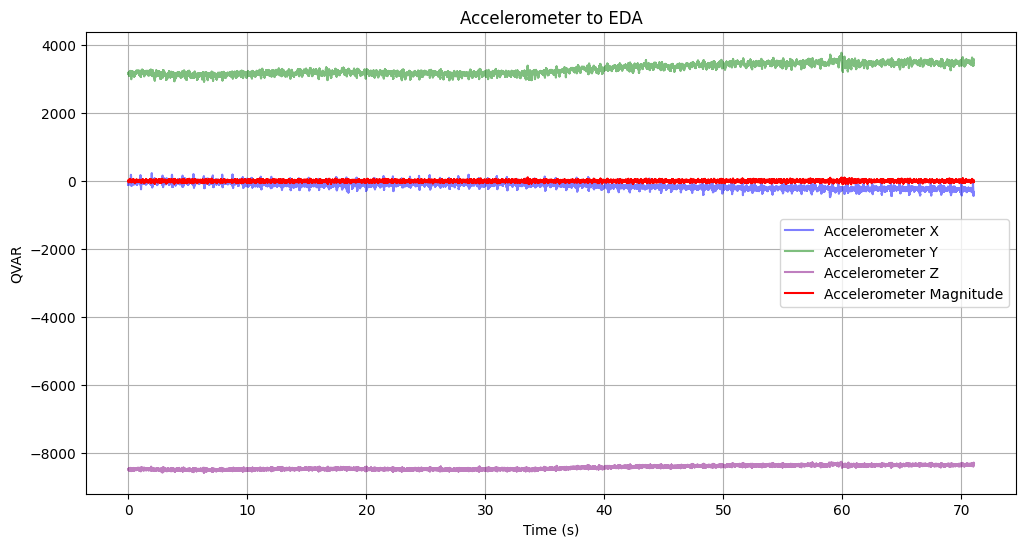

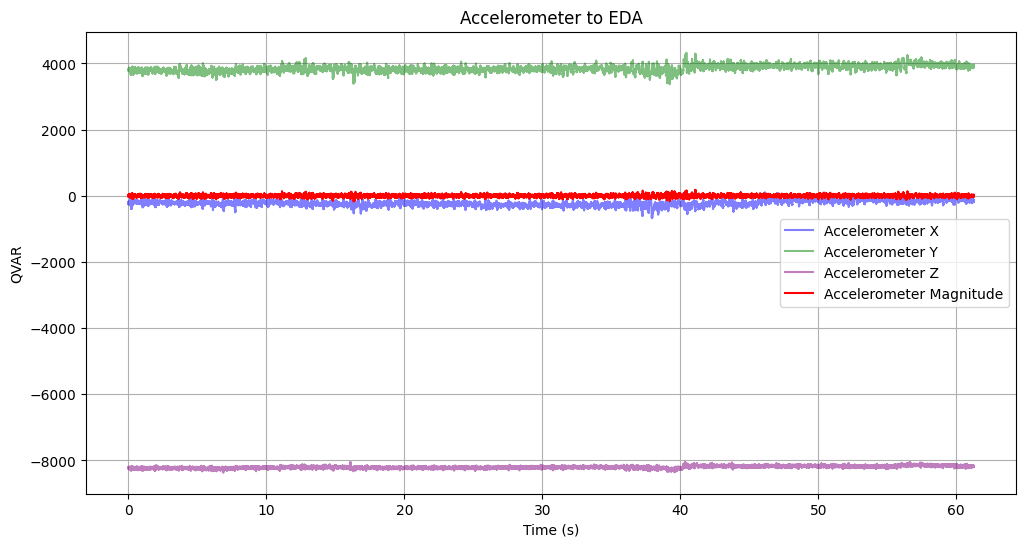

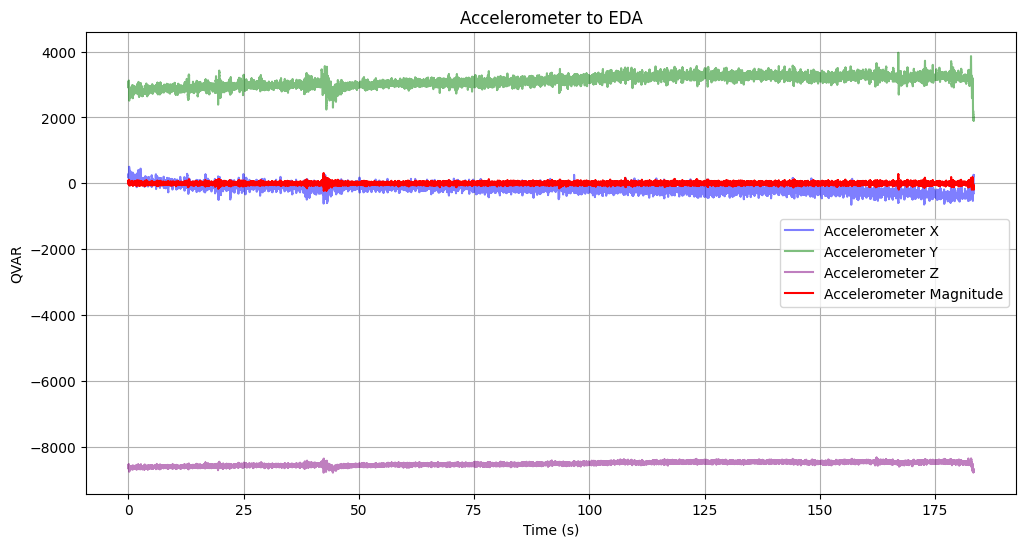

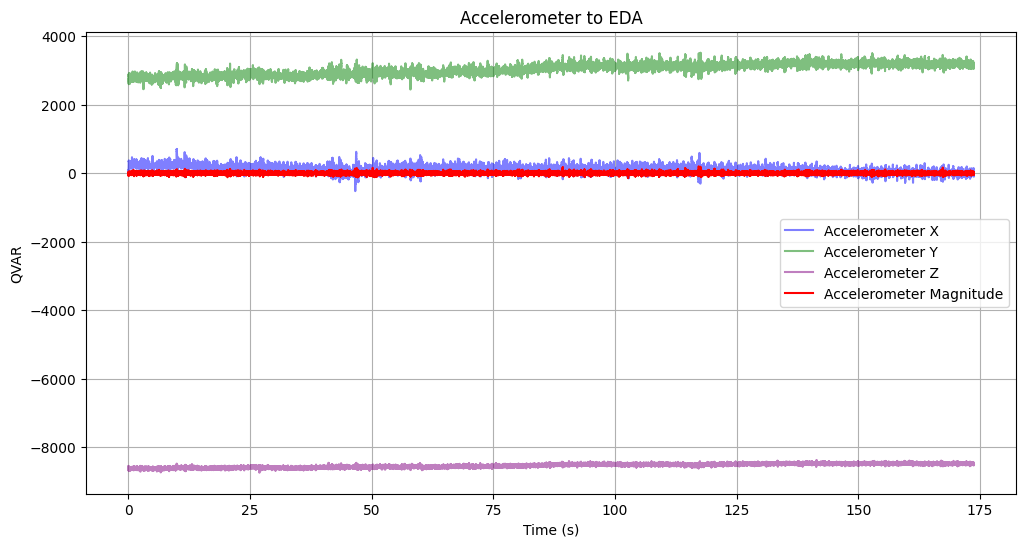

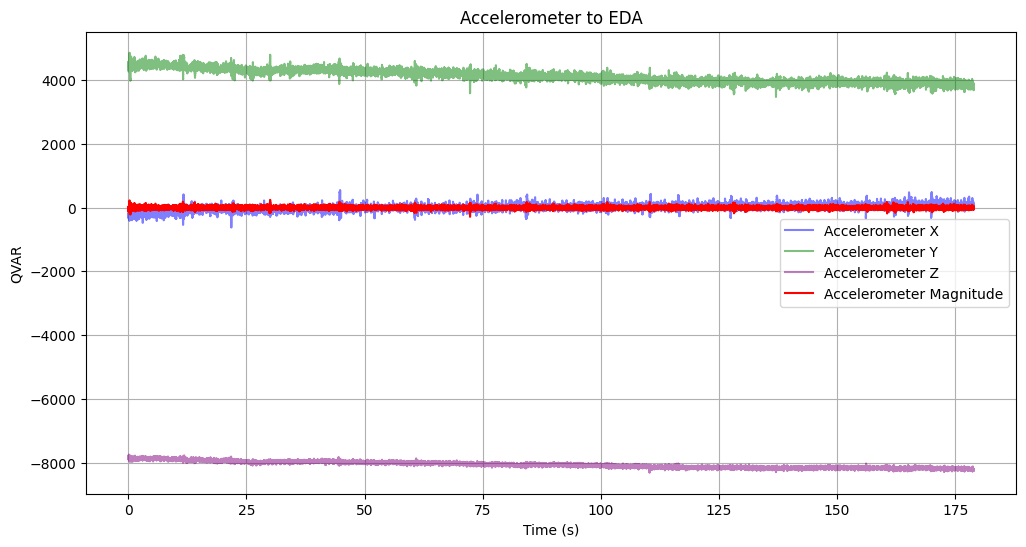

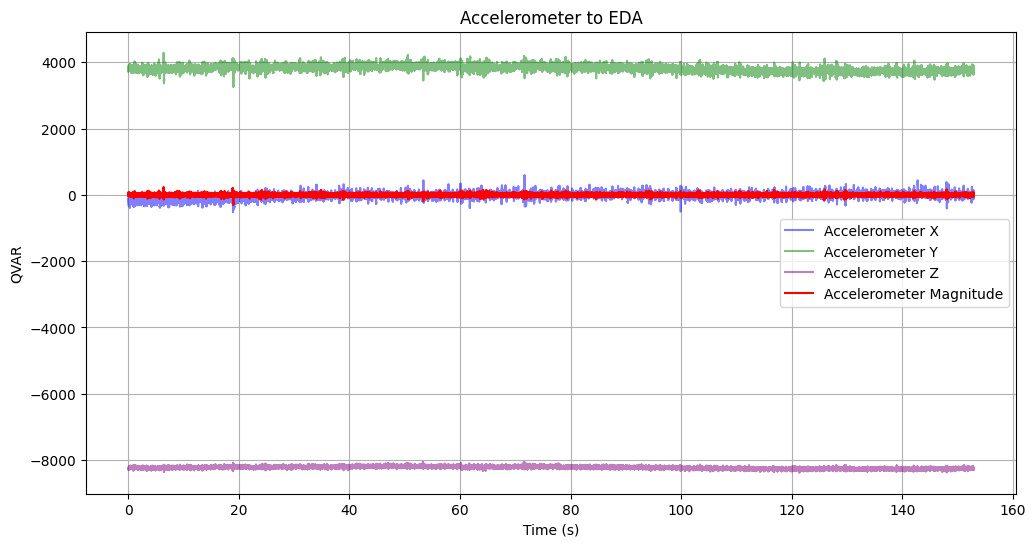

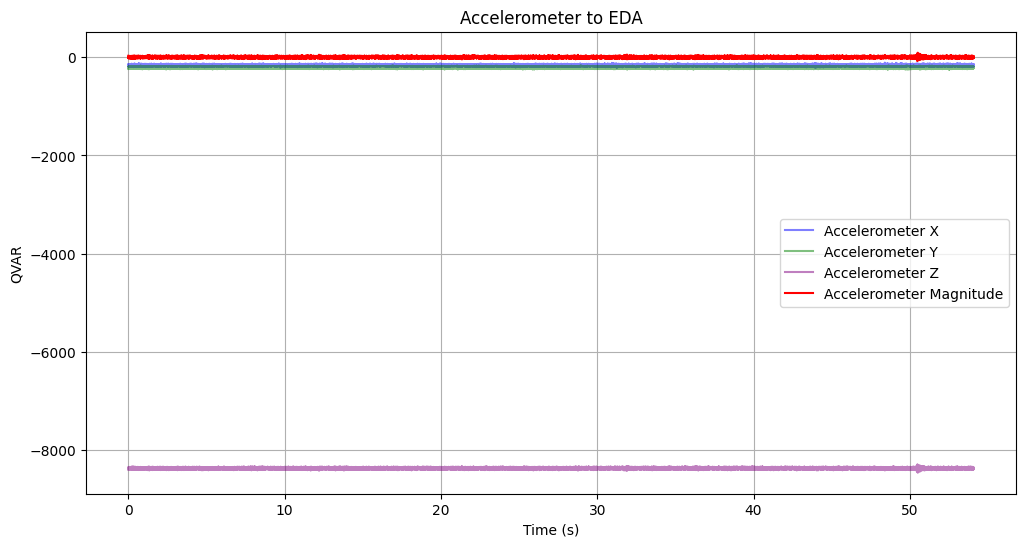

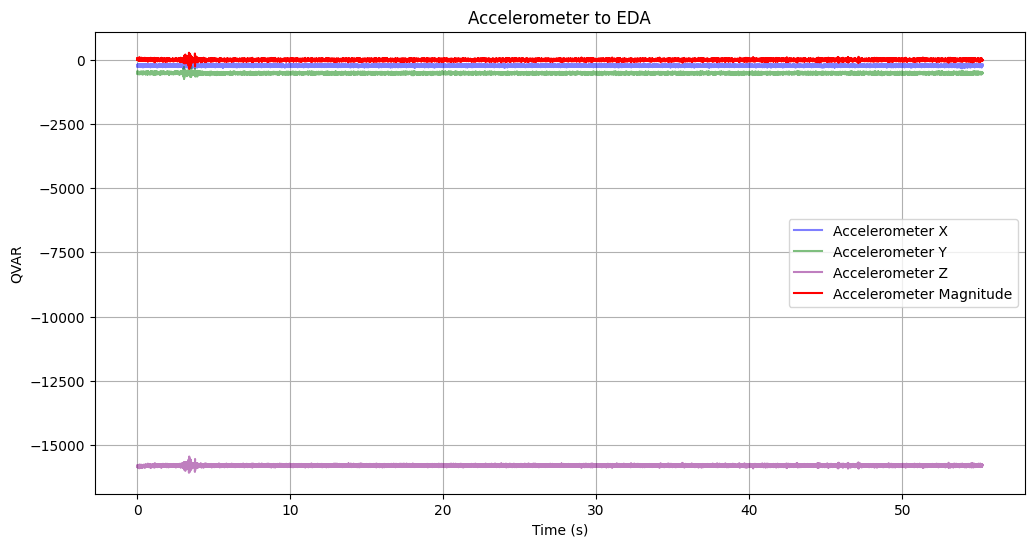

In [ ]:
#change file here
#file = "data/user_sarna3_test_class_000.txt"

#puts all the files together
filenames = glob.glob("data/*.txt")

#how many seconds are plotted
xlim_lower = 5
xlim_upper = 8

ylim_lower = -2000
ylim_upper = 0

for file in filenames:

    df = pd.read_csv(file, sep="\t")
    df = df.iloc[:, :-1]
    df['Timestamp_sec'] = df['Timestamp [us]'] / 1e6

    #TODO: raw QVAR image
    # plt.figure(figsize=(12, 4))
    # plt.plot(df['Timestamp_sec'], df['QVAR [LSB]'], color='blue')
    # plt.xlabel("Time (s)")
    # plt.ylabel("QVAR [LSB]")
    # plt.title("Raw QVAR signal over time")
    # #plt.xlim(xlim_lower, xlim_upper)
    # plt.grid(True)
    # plt.show()

    #low-pass filtered QVAR image

    # #parameter setting
    # fs = 120
    # cutoff = 5
    # order = 6
    # high_cutoff = 0.05

    # take QVAR and time
    time_sec = df['Timestamp_sec']
    qvar = df['QVAR [LSB]']


    df['qvar_low_filtered'] = butter_lowpass_filter(qvar, cutoff, fs, order)
    df['qvar_filtered'] = butter_highpass_filter(df['qvar_low_filtered'], high_cutoff, fs, 5)

    # plt.figure(figsize=(12, 6))
    # plt.plot(time_sec, qvar, label='Raw QVAR', color='blue', alpha=0.5)
    # plt.plot(time_sec, df['qvar_filtered'], label='Low-pass Filtered QVAR', color='red', linewidth=2)
    # plt.xlabel("Time (s)")
    # plt.ylabel("QVAR [LSB]")
    # plt.title(f"QVAR signal - Low-pass filtered (cutoff={cutoff} Hz)")
    # #plt.xlim(xlim_lower, xlim_upper)
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    #TODO: moving average graph
    window_size = 1000
    df['qvar_moving_avg'] = df['qvar_filtered'].rolling(window_size).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(time_sec, qvar, label='Raw QVAR', color='blue', alpha=0.5)
    plt.plot(time_sec, df['qvar_moving_avg'], label='Moving Average + low pass QVAR', color='red')
    plt.xlabel("Time (s)")
    plt.ylabel("QVAR [LSB]")
    plt.title(f"QVAR Moving Average Signal")
    #plt.xlim(xlim_lower,xlim_upper)
    #plt.ylim(ylim_lower, ylim_upper)
    plt.legend()
    plt.grid(True)
    plt.show()

    # TODO: gaussian moving average
    df['qvar_gaussian'] = df['qvar_filtered'].rolling(window_size, win_type='gaussian').mean(std = 3)

    plt.figure(figsize=(12, 6))
    plt.plot(time_sec, qvar, label='Raw QVAR', color='blue', alpha=0.5)
    plt.plot(time_sec, df['qvar_gaussian'], label='Gaussian Moving Average QVAR', color='red')
    plt.xlabel("Time (s)")
    plt.ylabel("QVAR [LSB]")
    plt.title(f"QVAR Gaussian Moving Average Signal")
    #plt.xlim(xlim_lower, xlim_upper)
    #plt.ylim(ylim_lower, ylim_upper)
    plt.legend()
    plt.grid(True)
    plt.show()

    # TODO: median filtering
    df['qvar_median'] = df['qvar_filtered'].rolling(window= window_size).median()

    plt.figure(figsize=(12, 6))
    plt.plot(time_sec, qvar, label='Raw QVAR', color='blue', alpha=0.5)
    plt.plot(time_sec, df['qvar_median'], label='Median Filter + low pass QVAR', color='red')
    plt.xlabel("Time (s)")
    plt.ylabel("QVAR [LSB]")
    plt.title(f"QVAR Median Filter Signal")
    #plt.xlim(xlim_lower,xlim_upper)
    #plt.ylim(ylim_lower, ylim_upper)
    plt.legend()
    plt.grid(True)
    plt.show()

    # TODO: accelerometer plot

    df['x_add'] = df['A_X [LSB]'] + df['A_X [mg]']
    df['y_add'] = df['A_Y [LSB]'] + df['A_Y [mg]']
    df['z_add'] = df['A_Z [LSB]'] + df['A_Z [mg]']

    # calculate mean  of 'accel_mag' and subtract it from 'accel_mag' -> removes gravity from the data
    df['acc_mag']= np.sqrt(df['x_add']**2 + df['y_add']**2 + df['z_add']**2)
    df['acc_mag'] -= df['acc_mag'].mean()

    plt.figure(figsize=(12, 6))
    plt.plot(time_sec, df['x_add'], label='Accelerometer X', color='blue', alpha=0.5)
    plt.plot(time_sec, df['y_add'], label='Accelerometer Y', color='green', alpha=0.5)
    plt.plot(time_sec, df['z_add'], label='Accelerometer Z', color='purple', alpha=0.5)
    plt.plot(time_sec, df['acc_mag'], label='Accelerometer Magnitude', color='red')
    plt.xlabel("Time (s)")
    plt.ylabel("QVAR")
    plt.title(f"Accelerometer to EDA")
    #plt.xlim(xlim_lower,xlim_upper)
    #plt.ylim(ylim_lower, ylim_upper)
    plt.legend()
    plt.grid(True)
    plt.show()

    df.to_csv(os.path.basename(file), index=False)


# Accelerometer Plot

In [41]:
# # TODO: accelerometer plot

# df['x_add'] = df['A_X [LSB]'] + df['A_X [mg]']
# df['y_add'] = df['A_Y [LSB]'] + df['A_Y [mg]']
# df['z_add'] = df['A_Z [LSB]'] + df['A_Z [mg]']

# # calculate mean  of 'accel_mag' and subtract it from 'accel_mag' -> removes gravity from the data
# df['acc_mag']= np.sqrt(df['x_add']**2 + df['y_add']**2 + df['z_add']**2)
# df['acc_mag'] -= df['acc_mag'].mean()

# plt.figure(figsize=(12, 6))
# plt.plot(time_sec, df['x_add'], label='Accelerometer X', color='blue', alpha=0.5)
# plt.plot(time_sec, df['y_add'], label='Accelerometer Y', color='green', alpha=0.5)
# plt.plot(time_sec, df['z_add'], label='Accelerometer Z', color='purple', alpha=0.5)
# plt.plot(time_sec, df['acc_mag'], label='Accelerometer Magnitude', color='red')
# plt.xlabel("Time (s)")
# plt.ylabel("QVAR")
# plt.title(f"Accelerometer to EDA")
# #plt.xlim(xlim_lower,xlim_upper)
# #plt.ylim(ylim_lower, ylim_upper)
# plt.legend()
# plt.grid(True)
# plt.show()

# df.to_csv(os.path.basename(file), index=False)